In [1]:
# !pip uninstall --yes qiskit qiskit-terra

In [2]:
# !pip install qiskit

In [3]:
# !pip install -U qiskit-aer

## Without Noise Model

In [4]:
from qiskit import QuantumCircuit
qc5 = QuantumCircuit

In [5]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import pennylane as qml
from pennylane import numpy as np

In [7]:
from qiskit import QuantumCircuit
from qiskit_aer.noise import NoiseModel, QuantumError, ReadoutError
from qiskit.circuit import Gate

In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import json

## Noisy Model

In [9]:
from qiskit_aer.noise import NoiseModel, QuantumError, ReadoutError
from qiskit_aer.noise.errors import pauli_error, depolarizing_error, thermal_relaxation_error
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

## Original Model

Measurement Counts: {'10101100': 3, '00111110': 1, '10101000': 2, '00011011': 3, '01001000': 2, '00000000': 2, '10000111': 2, '11010101': 1, '11011111': 2, '11101100': 5, '10000101': 3, '11110000': 4, '10001100': 2, '10111111': 1, '10100110': 4, '11100010': 2, '01101001': 3, '10001000': 2, '11101011': 4, '00001001': 3, '00011010': 3, '11000101': 5, '00110101': 2, '10100101': 4, '01011000': 3, '11010010': 2, '00111011': 5, '00000111': 4, '11111100': 3, '11100000': 2, '01010101': 4, '10010001': 6, '10110010': 6, '10001010': 1, '10001111': 3, '01111110': 3, '10000000': 1, '10011100': 2, '01001101': 2, '11001101': 3, '11001010': 6, '10010100': 5, '00001000': 7, '01111010': 5, '00011101': 1, '00111111': 7, '10110011': 4, '11000001': 3, '11100001': 5, '01110010': 1, '00110010': 7, '11011110': 3, '00111100': 3, '00001110': 5, '01000101': 4, '10101101': 4, '01111000': 2, '11010001': 2, '10011011': 3, '11001011': 3, '00101110': 3, '11001001': 5, '01101101': 5, '11100100': 8, '11111010': 3, '010

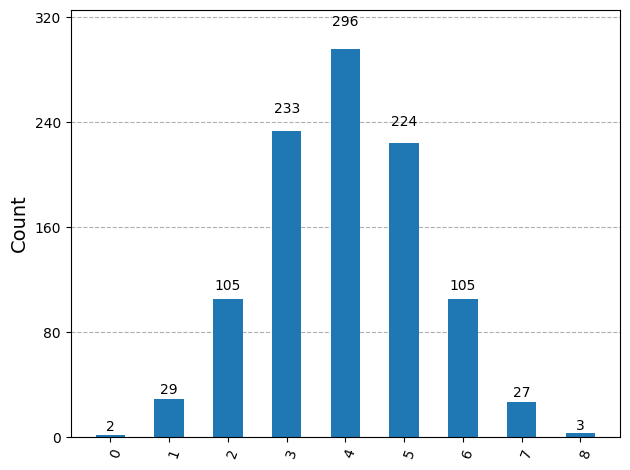

In [10]:
# set number of levels and pegs
n_levels_and_pegs = 8
theta = np.pi / 3 # this should skew our distribution right
# we need the ClassicalRegister for our swap
qr = QuantumRegister(n_levels_and_pegs, 'q')
cr = ClassicalRegister(n_levels_and_pegs, 'c')
qc3 = QuantumCircuit(qr, cr)

# We use the usual hadamard to simulate our pegs, but this time,
# we use a loop to initialize the levels and pegs
# for a simple n-level board, Hadamard gates suffice to generate the binomial distribution.
for i in range(n_levels_and_pegs):
## we use Ry(\theta) instead of Hadamard and this should give us a distribution that skews right.
    qc3.h(qr[i])

# We take a measurement. 
qc3.measure(qr, cr)

## we measure after to get our distribution
# here we are counting in the bitstring the number of 1s
# this gives us a pretty good count of our distribution ie. binomial
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc3, simulator)

# Execute the circuit and get the results
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the measurement outcomes
counts = result.get_counts(qc3)

print("Measurement Counts:", counts)
bin_counts = {}
for bitstring, count in counts.items():
    num_ones = bitstring.count('1')
    bin_counts[num_ones] = bin_counts.get(num_ones, 0) + count
bin_counts1 = bin_counts
counts4 = counts
plot_histogram(bin_counts)

## Make a custom noisy model

Measurement Counts: {'11000': 30, '01011': 32, '11100': 46, '10010': 24, '01100': 33, '01000': 33, '00000': 37, '10001': 35, '10100': 30, '00111': 25, '11110': 28, '11010': 29, '00001': 34, '00011': 28, '01001': 32, '11011': 39, '00100': 23, '10101': 24, '00101': 41, '10011': 33, '01110': 42, '01010': 25, '01101': 32, '10111': 30, '01111': 33, '00010': 34, '11001': 34, '10000': 26, '11101': 31, '00110': 35, '11111': 34, '10110': 32}


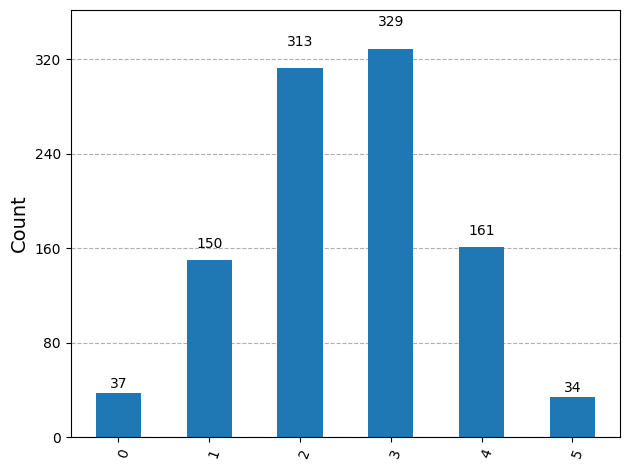

In [11]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError

# Define the number of levels and pegs
n_levels_and_pegs = 5 

# Create quantum and classical registers
qr = QuantumRegister(n_levels_and_pegs, 'q')
cr = ClassicalRegister(n_levels_and_pegs, 'c')

# Create the quantum circuit
qc5 = QuantumCircuit(qr, cr)

# Initialize the levels and pegs with Hadamard gates
for i in range(n_levels_and_pegs):
    qc5.h(qr[i])

# Take a measurement
qc5.measure(qr, cr)

# --- Add Noise ---

# 1. Create Noise Model
noise_model = NoiseModel()

##  2. Add depolarizing error to all H gates
# This means each H gate has a 1% chance of applying a random single-qubit Pauli error
depolarizing_prob = 0.01
error_h = depolarizing_error(depolarizing_prob, 1) 
noise_model.add_all_qubit_quantum_error(error_h, ['h'])

##  3. Add a readout error to measurements
# make a 5% chance of misreading a 0 as a 1, and 3% chance of misreading a 1 as a 0
readout_error_matrix = [[0.95, 0.05], [0.03, 0.97]]
readout_error = ReadoutError(readout_error_matrix)
noise_model.add_all_qubit_readout_error(readout_error)

# 4. Select Aer Simulator with Noise Model
simulator = AerSimulator(noise_model=noise_model)

# 5. Execute the circuit with noise
job = simulator.run(qc5, shots=1024) 
result = job.result()
counts = result.get_counts(qc5)

print("Measurement Counts:", counts)
bin_counts = {}
for bitstring, count in counts.items():
    num_ones = bitstring.count('1')
    bin_counts[num_ones] = bin_counts.get(num_ones, 0) + count
bin_counts2 = bin_counts
plot_histogram(bin_counts2)

# print("Counts with noise:", counts)
# plot_histogram(counts)

## Show counts with noise

Counts with noise: {'11000': 30, '01011': 32, '11100': 46, '10010': 24, '01100': 33, '01000': 33, '00000': 37, '10001': 35, '10100': 30, '00111': 25, '11110': 28, '11010': 29, '00001': 34, '00011': 28, '01001': 32, '11011': 39, '00100': 23, '10101': 24, '00101': 41, '10011': 33, '01110': 42, '01010': 25, '01101': 32, '10111': 30, '01111': 33, '00010': 34, '11001': 34, '10000': 26, '11101': 31, '00110': 35, '11111': 34, '10110': 32}


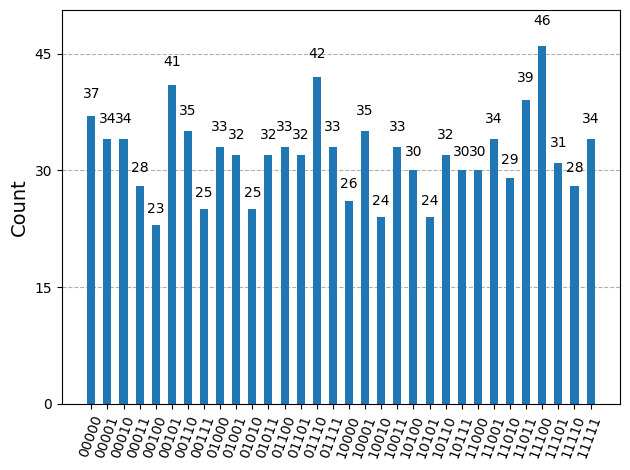

In [12]:
print("Counts with noise:", counts)
plot_histogram(counts)

## Show Distributional difference between noise and no noise model

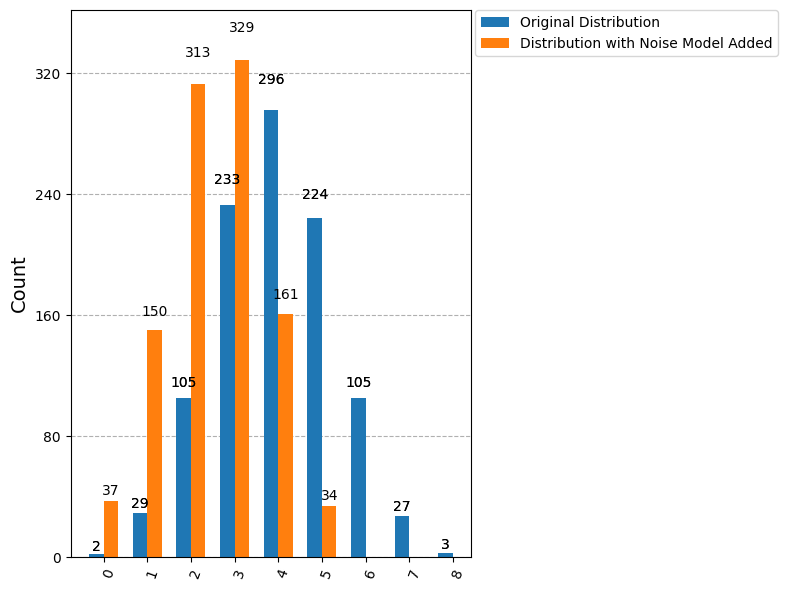

In [13]:
from qiskit.visualization import plot_histogram

legend = ['Original Distribution', 'Distribution with Noise Model Added'] # Optional legend for clarity

# Plotting the histograms on top of each other
plot_histogram([bin_counts1, bin_counts2], legend=legend, figsize=(8, 6)) 
